# Introduction

## Loan Status Prediction

In finance, a loan is the lending of money by one or more individuals, organizations or others entities to other individuals, organizations, etc. The recipient, the borrower, incurs a debt and is usually liable to pay interest on that debt until it is repaid as well as to repay the principal amount borrowed.

### The main goal of this notebook is to predict which of the custumers will have their loan approved.

# The Project

## Data reference and data dictionary

This dataser is founded in [Kaggle](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv).

The dictionary is:
![dictionary.png](./img/dictionary.png)

In [1]:
## Or
# from IPython.display import Image
# Image(url = '.img/dictionary.png')

In [2]:
# !pip install watermark

In [61]:
# !pip install imblearn

## Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from platform import python_version
print('Version Python Language used in this| Jupyter Notebook:', python_version())

Version Python Language used in this| Jupyter Notebook: 3.9.13


In [5]:
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 1.4.4
seaborn   : 0.11.2
numpy     : 1.21.5
matplotlib: 3.5.2



## Loading dataset

In [6]:
df = pd.read_csv(
  filepath_or_buffer="./data/train_u6lujuX_CVtuZ9i.csv",
  sep=","
)
df.head(n=5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## First Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The columns "ApplicantIncome", "CoapplicationIncome" and "LoanAmount" has the Mean and Max values very far away from each other.
The columns "LoanAmount", "Loan_Amount_Term" and "Credit_History" has count less than 614, probabily there are NAN values.

In [10]:
df.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


The columns "Gender", "Married", "Dependents" and Self_Employed has NAN (Not A Number) values.

In [11]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
for col in df.columns:
  display(df[col].value_counts())

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Separating categorical and numerics variables

In [14]:
numerics = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]
numerics

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [15]:
categorical = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

### Fill NAN values on Categorical variables with mode.

In [16]:
for col in df[categorical]:
  df[col] = df[col].fillna(value=df[col].mode()[0])
  
df.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


In [17]:
df[categorical].isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [18]:
df[categorical].isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [19]:
df.sample(n=5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
65,LP001225,Male,Yes,0,Graduate,No,5726,4595.0,258.0,360.0,1.0,Semiurban,N
588,LP002925,Male,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y
245,LP001813,Male,No,0,Graduate,Yes,6050,4333.0,120.0,180.0,1.0,Urban,N
139,LP001493,Male,Yes,2,Not Graduate,No,4200,1430.0,129.0,360.0,1.0,Rural,N


### Fill NAN values of the numerics variables with median.

In [20]:
for col in df[numerics]:
  df[col] = df[col].fillna(value=df[col].median())
  
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [21]:
df[numerics].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [22]:
df[numerics].isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [23]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Outliers detection and Handling

In [24]:
def plot_outliers_detection():
    # plt.figure(figsize=(15,10))
    plt.style.use(style="fivethirtyeight")
    plt.rcParams["figure.figsize"] = (15, 6)

    plt.subplot(1, 3, 1)
    sns.boxplot(y=df["ApplicantIncome"], data=df["ApplicantIncome"])

    plt.subplot(1, 3, 2)
    sns.boxplot(y=df["CoapplicantIncome"],data=df["CoapplicantIncome"])

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df["LoanAmount"], data=df["LoanAmount"])

    plt.suptitle(t="Outliers Detection")
    plt.show();

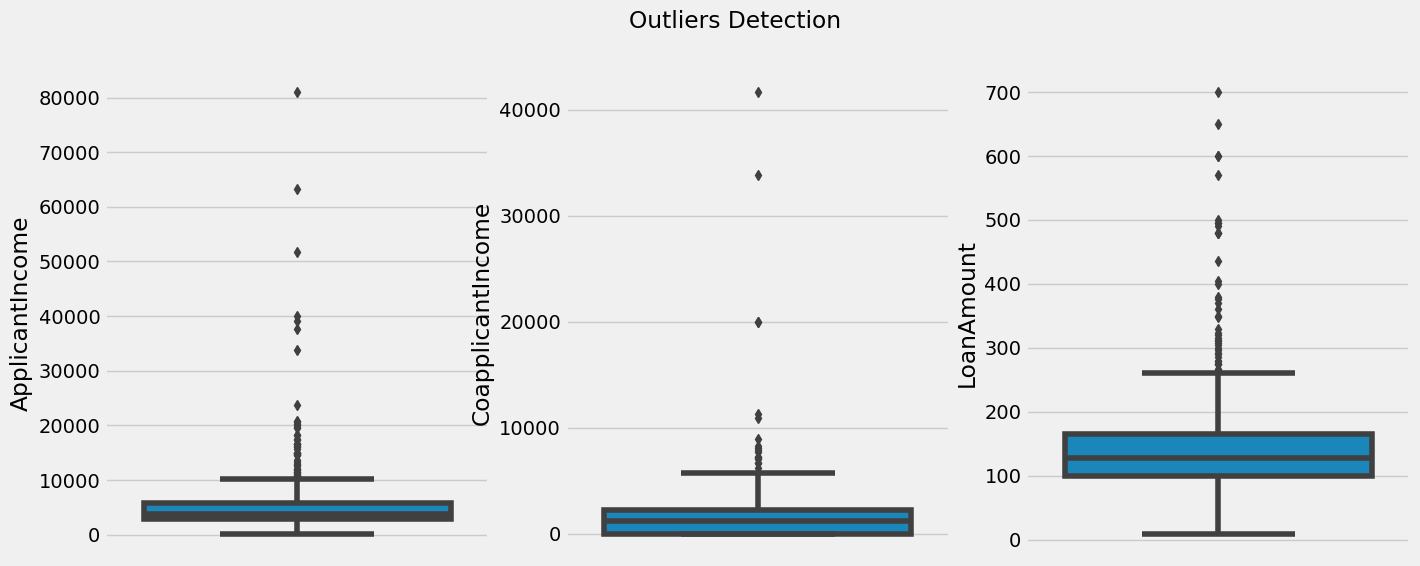

In [25]:
plot_outliers_detection()

Removing outliers without estatistical method

In [26]:
df["ApplicantIncome"][df["ApplicantIncome"] < 25000].count()

607

In [27]:
df = df[df["ApplicantIncome"] < 25000]

In [28]:
df = df[df["CoapplicantIncome"] < 12000]

In [29]:
df = df[df["LoanAmount"] < 400]

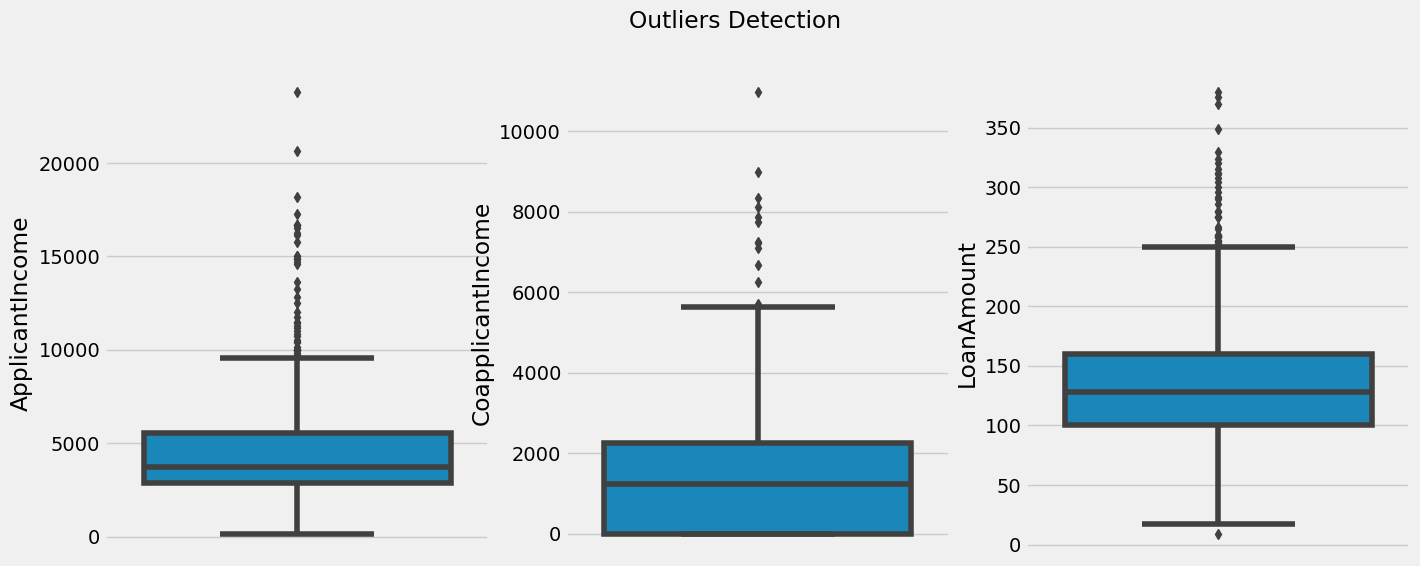

In [30]:
plot_outliers_detection()

## Data Analysis

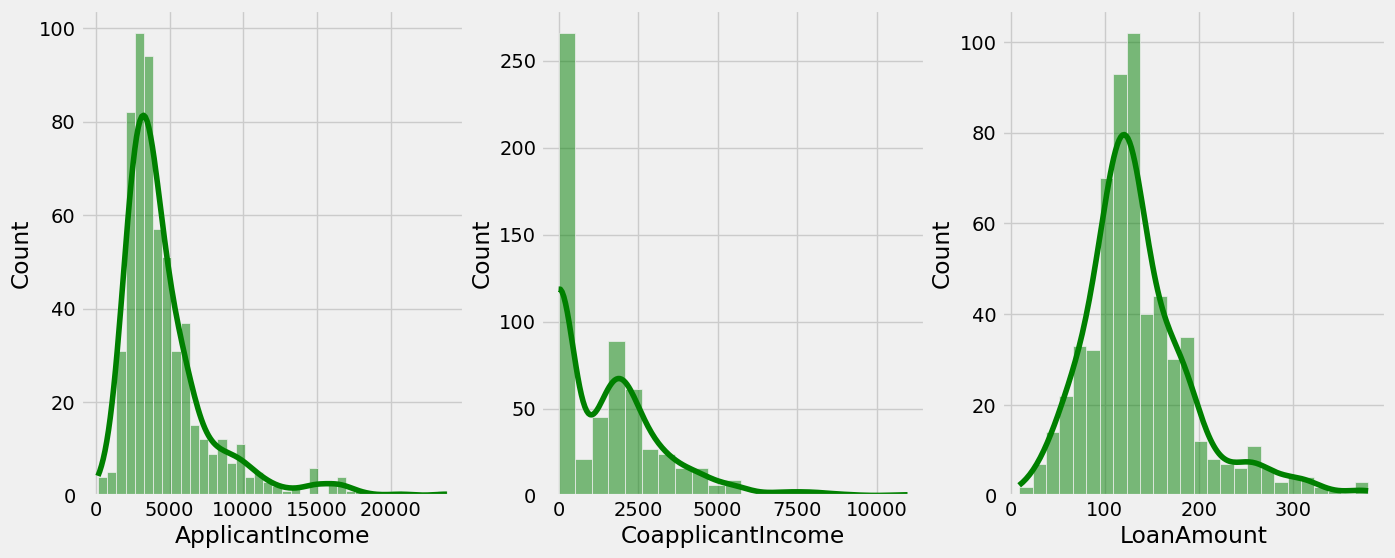

In [31]:
plt.subplot(1, 3, 1)
sns.histplot(df["ApplicantIncome"], color="green", kde=True)

plt.subplot(1, 3, 2)
sns.histplot(df["CoapplicantIncome"], color="green", kde=True)

plt.subplot(1, 3, 3)
sns.histplot(df["LoanAmount"], color="green", kde=True);

In [32]:
df["ApplicantIncome"] = np.log(df["ApplicantIncome"])
df["CoapplicantIncome"] = np.log1p(df["CoapplicantIncome"])

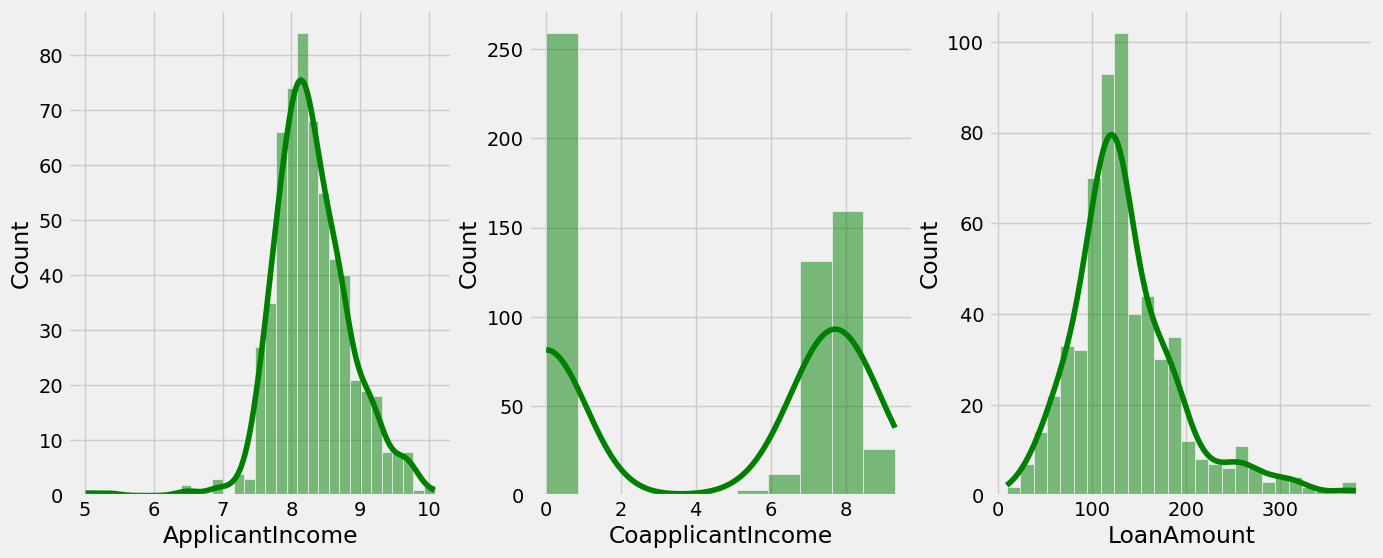

In [33]:
plt.subplot(1, 3, 1)
sns.histplot(df["ApplicantIncome"], color="green", kde=True)

plt.subplot(1, 3, 2)
sns.histplot(df["CoapplicantIncome"], color="green", kde=True)

plt.subplot(1, 3, 3)
sns.histplot(df["LoanAmount"], color="green", kde=True);

In [34]:
num = df.select_dtypes("number").columns.tolist()
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [35]:
cat = df.select_dtypes("object").columns.tolist()
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

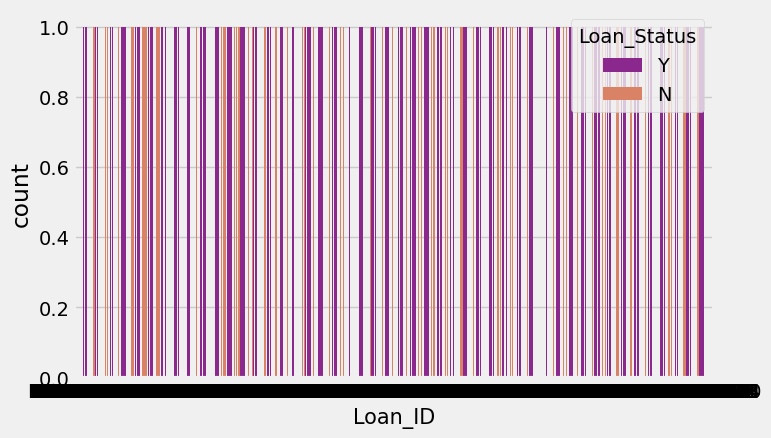

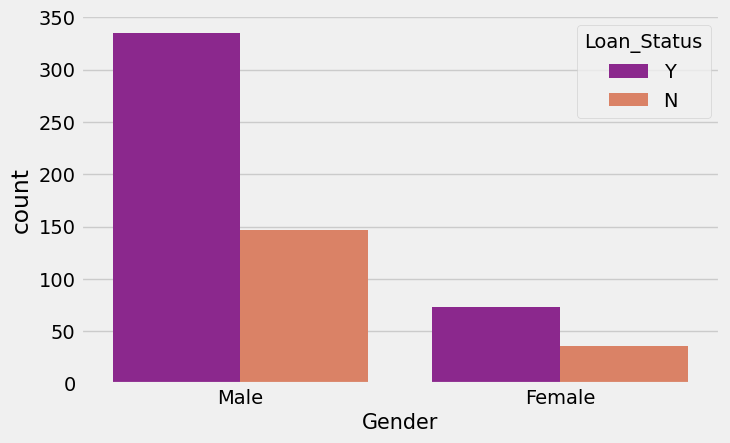

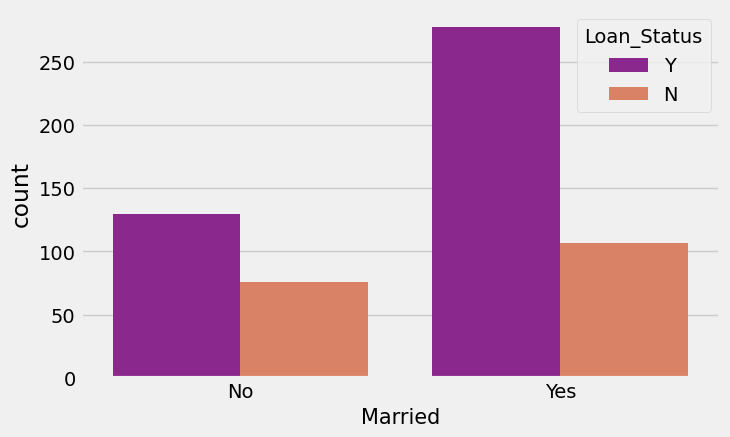

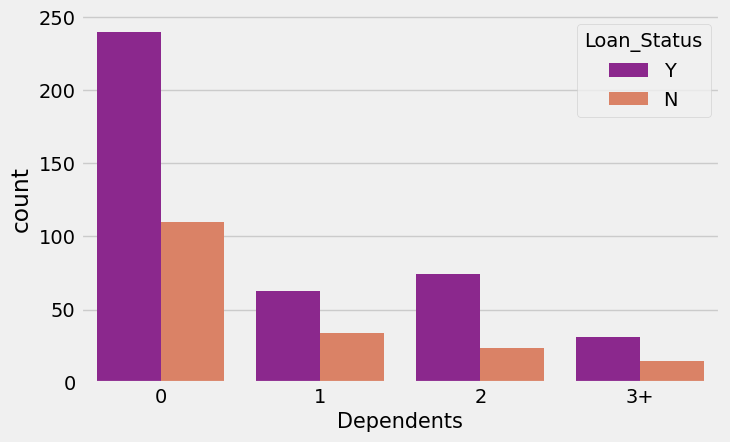

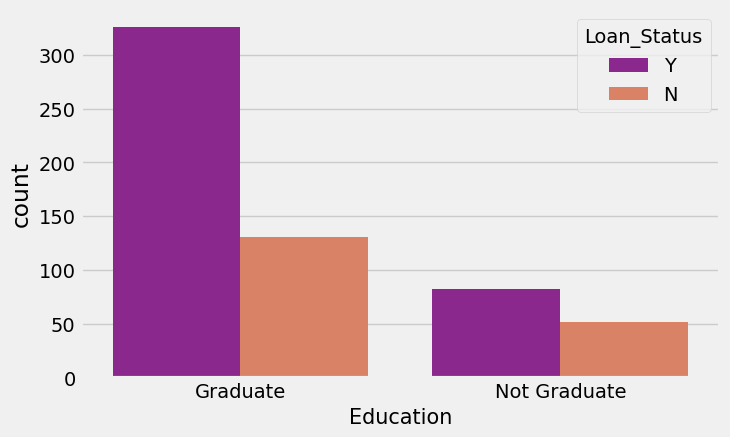

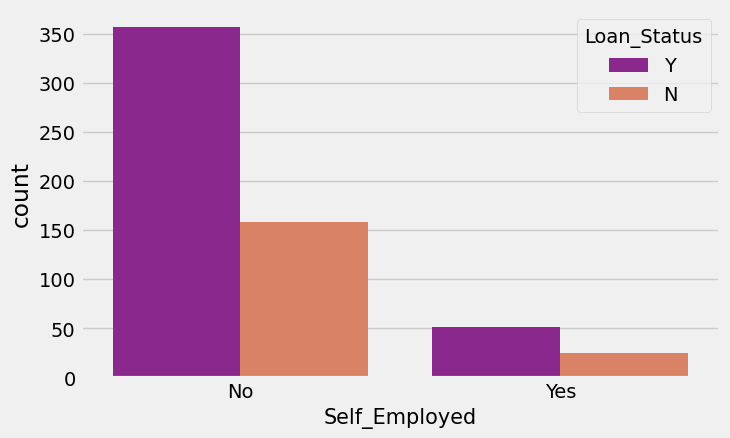

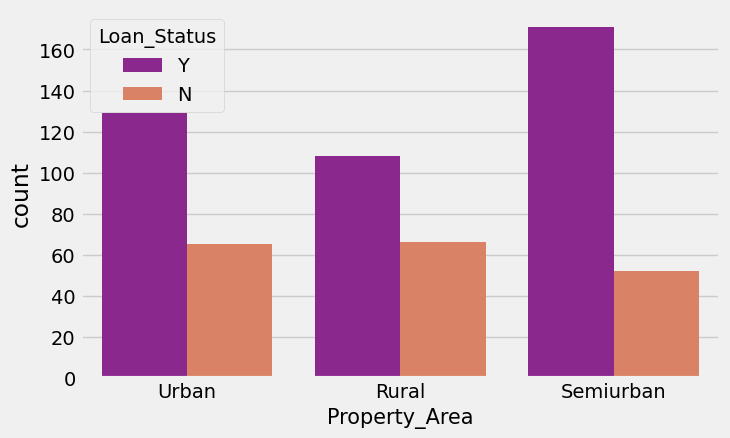

In [36]:
for categorical in cat[:-1]:
    plt.figure(figsize=(25, 10))
    plt.subplot(2, 3, 1)
    sns.countplot(x=categorical, hue="Loan_Status", data=df, palette="plasma")
    plt.xlabel(categorical, fontsize=15)

Another way to analise data

So, the number of loan done is bigger when the person is married. But, this analise is not relational. It is absolut.

In [37]:
pd.crosstab(df["Loan_Status"], df["Married"])

Married,No,Yes
Loan_Status,,
N,76,107
Y,130,278


In [38]:
pd.crosstab(df["Loan_Status"], df["Education"])

Education,Graduate,Not Graduate
Loan_Status,,
N,131,52
Y,326,82


In [39]:
pd.crosstab(df["Loan_Status"], df["Property_Area"])

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,66,52,65
Y,108,171,129


## Data Preprocessing

In [40]:
df.select_dtypes("object").sample(n=5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
200,LP001674,Male,Yes,1,Not Graduate,No,Semiurban,Y
566,LP002836,Male,No,0,Graduate,No,Urban,Y
583,LP002898,Male,Yes,1,Graduate,No,Rural,N
240,LP001798,Male,Yes,2,Graduate,No,Rural,Y
363,LP002178,Male,Yes,0,Graduate,No,Urban,Y


In [41]:
df[cat].head(n=5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


Removing variable "Loan_ID" because is not necessary for our predict model

In [42]:
df = df.drop(columns=["Loan_ID"], axis=1)
df.head(n=5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


Replacing Male to 1 and Female to 0

In [43]:
df["Gender"] = df["Gender"].replace(to_replace=["Male", "Female"], value=[1, 0])
df.sample(n=5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
158,1,No,0,Graduate,No,7.999679,7.642044,120.0,360.0,1.0,Rural,Y
287,1,Yes,0,Graduate,No,8.217169,7.601402,120.0,360.0,1.0,Rural,Y
18,1,Yes,0,Not Graduate,No,8.494334,0.000000,133.0,360.0,1.0,Rural,N
143,1,Yes,0,Graduate,No,7.900266,7.618251,122.0,360.0,1.0,Semiurban,Y
142,1,No,0,Graduate,Yes,8.846497,0.000000,175.0,180.0,1.0,Semiurban,Y


Replacing Marrid to 1 when they are married (y) and 0 when they not are married (n)

In [44]:
df["Married"] = df["Married"].replace(to_replace=["Yes", "No"], value=[1, 0])
df.sample(n=5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
25,1,1,0,Graduate,Yes,9.165343,0.000000,191.0,360.0,1.0,Semiurban,Y
168,1,0,0,Graduate,No,7.712891,0.000000,63.0,480.0,0.0,Semiurban,N
594,1,1,0,Graduate,Yes,9.687816,0.000000,260.0,360.0,1.0,Urban,Y
373,1,0,1,Graduate,No,8.026824,7.594884,111.0,180.0,0.0,Urban,N
357,1,1,1,Graduate,No,8.262301,0.000000,67.0,360.0,1.0,Urban,N


In [45]:
df["Education"] = df["Education"].replace(to_replace=["Graduate", "Not Graduate"], value=[1, 0])
df.sample(n=5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
430,0,0,1,1,Yes,9.062304,0.000000,150.0,360.0,1.0,Semiurban,Y
489,1,0,0,1,No,7.797702,0.000000,75.0,360.0,1.0,Urban,N
303,1,1,1,1,No,7.393263,7.497762,96.0,360.0,1.0,Urban,Y
60,1,1,0,1,No,7.824046,8.241967,120.0,360.0,1.0,Urban,Y
576,1,1,0,1,No,8.034955,7.701200,136.0,360.0,0.0,Semiurban,N


In [46]:
df["Self_Employed"] = df["Self_Employed"].replace(to_replace=["Yes", "No"], value=[1, 0])
df.sample(n=5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
486,1,0,2,1,0,8.173857,0.000000,80.0,360.0,0.0,Rural,N
452,1,1,0,1,0,8.280964,7.458186,149.0,360.0,0.0,Rural,N
255,0,0,3+,1,0,8.033658,0.000000,255.0,360.0,1.0,Rural,Y
150,1,0,0,1,0,8.744647,0.000000,118.0,360.0,0.0,Rural,N
303,1,1,1,1,0,7.393263,7.497762,96.0,360.0,1.0,Urban,Y


In [47]:
df["Loan_Status"] = df["Loan_Status"].replace(to_replace=["Y", "N"], value=[1, 0])
df.sample(n=5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
504,1,1,0,0,0,8.246434,7.302496,124.0,300.0,1.0,Semiurban,1
181,1,0,0,1,0,7.557995,8.529912,67.0,360.0,1.0,Rural,0
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,Rural,0
73,1,1,3+,0,0,8.466952,0.000000,95.0,360.0,0.0,Semiurban,0
433,1,1,0,1,0,7.793587,7.758333,143.0,360.0,1.0,Semiurban,1


One-hot encoding

In [50]:
df = df.join(pd.get_dummies(df["Property_Area"], prefix="Property_Area"))
df.head(n=5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area__Rural,Property_Area__Semiurban,Property_Area__Urban
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,Urban,1,0,0,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,Rural,0,1,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,Urban,1,0,0,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,Urban,1,0,0,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,Urban,1,0,0,1


In [51]:
df = df.drop(columns=["Property_Area"])
df.head(n=5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area__Rural,Property_Area__Semiurban,Property_Area__Urban
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,0,0,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,1,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,0,0,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,0,0,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,0,0,1


In [52]:
df["Dependents"].value_counts()

0     350
2      98
1      97
3+     46
Name: Dependents, dtype: int64

In [53]:
df = df.join(pd.get_dummies(df["Dependents"], prefix="Dependents"))
df.head(n=5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area__Rural,Property_Area__Semiurban,Property_Area__Urban,Dependents__0,Dependents__1,Dependents__2,Dependents__3+
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,0,0,1,1,0,0,0
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,0,0,1,1,0,0,0


In [54]:
df = df.drop(columns=["Dependents"])
df.head(n=5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area__Rural,Property_Area__Semiurban,Property_Area__Urban,Dependents__0,Dependents__1,Dependents__2,Dependents__3+
0,1,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,0,0,1,1,0,0,0
1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,1,1,8.006368,0.000000,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,0,0,7.856707,7.765993,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,0,0,1,1,0,0,0


In [55]:
target = df["Loan_Status"]
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [56]:
df_train = df.drop(columns=["Loan_Status"], axis=1)
df_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area__Rural,Property_Area__Semiurban,Property_Area__Urban,Dependents__0,Dependents__1,Dependents__2,Dependents__3+
0,1,0,1,0,8.674026,0.000000,128.0,360.0,1.0,0,0,1,1,0,0,0
1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,1,0,0,0,1,0,0
2,1,1,1,1,8.006368,0.000000,66.0,360.0,1.0,0,0,1,1,0,0,0
3,1,1,0,0,7.856707,7.765993,120.0,360.0,1.0,0,0,1,1,0,0,0
4,1,0,1,0,8.699515,0.000000,141.0,360.0,1.0,0,0,1,1,0,0,0


In [57]:
df_train.shape

(591, 16)

In [58]:
df_train.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area__Rural', 'Property_Area__Semiurban',
       'Property_Area__Urban', 'Dependents__0', 'Dependents__1',
       'Dependents__2', 'Dependents__3+'],
      dtype='object')

## Model

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
x_sample, y_sample = SMOTE().fit_resample(df_train, target.values.ravel())

print(x_sample.shape)
print(y_sample.shape)

(816, 16)
(816,)


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=0)

In [75]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(652, 16)
(652,)
(164, 16)
(164,)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [76]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/home/well/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy

In [77]:
y_pred = log_reg.predict(x_test)

In [78]:
log_reg.score(x_train, y_train)

0.843558282208589

In [79]:
log_reg.score(x_test, y_test)

0.823170731707317

In [85]:
print(classification_report(y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        82
           1       0.78      0.90      0.84        82

    accuracy                           0.82       164
   macro avg       0.83      0.82      0.82       164
weighted avg       0.83      0.82      0.82       164



The model Accuracy is:

In [87]:
accuracy_score(y_pred, y_test)

0.823170731707317

In [89]:
df_train.head(n=3)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area__Rural,Property_Area__Semiurban,Property_Area__Urban,Dependents__0,Dependents__1,Dependents__2,Dependents__3+
0,1,0,1,0,8.674026,0.000000,128.0,360.0,1.0,0,0,1,1,0,0,0
1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,1,0,0,0,1,0,0
2,1,1,1,1,8.006368,0.000000,66.0,360.0,1.0,0,0,1,1,0,0,0


In [110]:
values_test_model_prediction = np.array([
    [
        0,         # Gender
        0,         # Married
        0,         # Education
        1,         # Self_Employed
        0,      # ApplicantIncome
        0,       # CoapplicantIncome
        0,       # LoanAmount
        120,       # Loan_Amount_Term
        1,         # Credit_History
        0,         # Property_Area_Rural
        0,         # Property_Area_Semiurban
        1,         # Property_Area_Urban
        0,         # Dependents_0
        0,         # Dependents_1
        0,         # Dependents_2
        1          # Dependents_3+
    ]
])

> Zero (0) means that de Loan was declined and 1 means was accepted

In [111]:
model_prediction = log_reg.predict(values_test_model_prediction)
model_prediction[0]

/home/well/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1